# Proyecto de CodeCademy : Análisis de datos de parque nacional 

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

En primer lugar se cargan en un dataframe de Pandas los datos del parque nacional

In [63]:
df = pd.read_csv('species_info.csv')
df.head(10)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Se obtienen la cantidad de especies diferentes que hay dentro de los datos.

In [68]:
df.scientific_name.nunique()

5541

Se obtienen las diferentes categorias y estados de conservacion

In [69]:
df.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [70]:
df.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

Ahora, se agrupan los datos a partir del estado de conservación y se cuenta la cantidad de especies dentro de cada uno

In [71]:
df.groupby('conservation_status').scientific_name.count().reset_index()

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


En la tabla anterior no aparecen los valores nulos, vamos a reemplazar estos con "No Invervention"

In [72]:
df.fillna('No Intervention', inplace=True)

In [73]:
df.groupby('conservation_status').scientific_name.count().reset_index()

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,No Intervention,5633
3,Species of Concern,161
4,Threatened,10


Se ordena la tabla anterior de forma ascendente 

In [74]:
contador_especies = df.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
contador_especies.head()

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


Usando Seaborn se realiza un gráfico de barras en el que se muestran la cantidad de especies por estado de conservación. Se observa que la mayor parte de los datos son del estado "No Invervention"

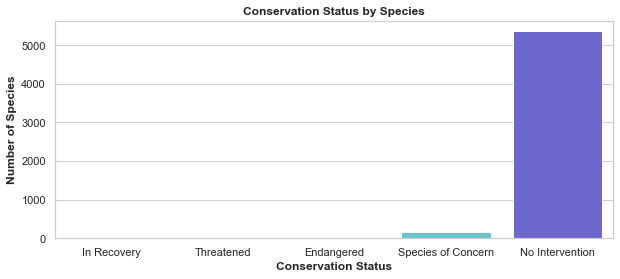

In [75]:

sns.set_style("whitegrid")
sns.set_palette("hls")

f,ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(x='conservation_status',y = 'scientific_name', data = contador_especies)
ax.set_xlabel('Conservation Status',weight='bold')
ax.set_ylabel('Number of Species',weight='bold')
ax.set_title('Conservation Status by Species',weight='bold')
plt.show()

Se agrega una columna "is_protected" donde todos los estados de conservacion que son 'No invervention' se llenan con False, el resto True

In [76]:
df['is_protected'] = df.conservation_status.apply(lambda x: True if x != 'No Intervention' else False)
df.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Se crea un nuevo DataFrame en el que se agrupa por la columna 'category' y 'is_protected' y se cuenta la cantidad de especies diferentes.

In [77]:
cuenta_categoria = df.groupby(['category','is_protected']).scientific_name.nunique().reset_index()
cuenta_categoria  

             category  is_protected  scientific_name
0           Amphibian         False               72
1           Amphibian          True                7
2                Bird         False              413
3                Bird          True               75
4                Fish         False              115
5                Fish          True               11
6              Mammal         False              146
7              Mammal          True               30
8   Nonvascular Plant         False              328
9   Nonvascular Plant          True                5
10            Reptile         False               73
11            Reptile          True                5
12     Vascular Plant         False             4216
13     Vascular Plant          True               46


Se remodela la tabla de forma de tener True y False como columnas

In [78]:
categoria_pivot = cuenta_categoria.pivot(columns = 'is_protected',index = 'category',values='scientific_name').reset_index()

In [79]:
categoria_pivot.head()

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


Se cambia el nombre a las columnas

In [80]:
categoria_pivot.columns = ['category', 'not_protected', 'protected']
categoria_pivot.head()

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


Se agrega una columna 'percent_protected' en donde se calcula el porcentaje de especies 'protected' sobre el total para cada categoria

In [90]:
categoria_pivot['percent_protected'] = categoria_pivot.protected / (categoria_pivot.protected + categoria_pivot.not_protected)
categoria_pivot

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           0.088608
1               Bird            413         75           0.153689
2               Fish            115         11           0.087302
3             Mammal            146         30           0.170455
4  Nonvascular Plant            328          5           0.015015
5            Reptile             73          5           0.064103
6     Vascular Plant           4216         46           0.010793


Se plantea la hipotesis de que las especies en la categoria 'Mammal' tienen más probabilidades de estar en peligro que las especies en 'Bird'. Para corroborarlo se hace un test de hipotesis χ². Para eso se una tabla de contingencia.

In [82]:
contingency = [[30, 146],
              [75, 413]]

El test se realiza con el modulo 'chi2_contingency' de scipy.stats. Se usa un nivel de confianza de 95%. Para descartar la hipotesis nula pval deberia ser menor a 0.05, lo cual no es asi. Por lo tanto, no se puede aceptar la hipotesis alternativa. 

In [86]:
pval = chi2_contingency(contingency)
print(pval)

(0.1617014831654557, 0.6875948096661336, 1, array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))


Se realiza lo mismo para las categorias 'Mammal' y 'Reptile' y se ve que para este caso si hay una diferencia considerable.

In [88]:
contingency2 = [[30, 146],
              [5, 73]]

In [89]:
pval2 = chi2_contingency(contingency2)
print(pval2)

(4.289183096203645, 0.03835559022969898, 1, array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))


Se cargan datos sobre observaciones de especies en parques nacionales en los últimos 7 dias. 

In [96]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Se pretende encontrar todas las observaciones de ovejas ('Sheep') para eso se busca en 'common_names' de el primer DataFrame 'df' todos los que contengan la palabra Sheep. Se crea una columna 'is_sheep'.

In [98]:
df['is_sheep'] = df.common_names.apply(lambda x: True if 'Sheep' in x else False)
df.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [99]:
df[df.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Muchos de los nombres que contiene 'sheep' son plantas, asique se crea una tabla donde se agrega la condicion de que sean 'Mammal'

In [104]:
sheep_species = df[(df.is_sheep) & (df.category == 'Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Se unen las tabla 'sheep_species' con 'observations' en las filas donde haya coincidencias

In [111]:
sheep_observations = pd.merge(sheep_species,observations)
sheep_observations

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219
5,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Bryce National Park,109
6,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yosemite National Park,117
7,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Great Smoky Mountains National Park,48
8,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yellowstone National Park,67
9,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yosemite National Park,39


Se crea una tabla con la suma total de observaciones de ovejas por parque

In [112]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Por último, se grafica la cantidad de observaciones de oveja por parque.

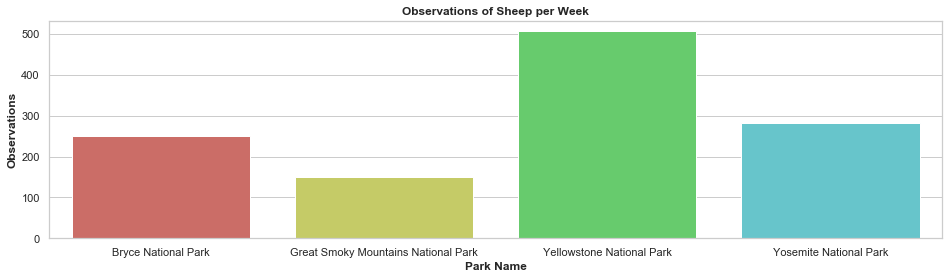

In [114]:
f2,ax2 = plt.subplots(figsize=(16,4))
ax2 = sns.barplot(x='park_name',y = 'observations', data = obs_by_park)
ax2.set_xlabel('Park Name',weight='bold')
ax2.set_ylabel('Observations',weight='bold')
ax2.set_title('Observations of Sheep per Week',weight='bold')
plt.show()